<a href="https://colab.research.google.com/github/Dzakiyy-ah/Paddy-Gorontalo-Image-Classification/blob/main/Real_Match.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔴Important Syntax**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import matplotlib.image as mpimg
%matplotlib inline


from tensorflow.keras.preprocessing import image
from google.colab import files
from google.colab import drive
from PIL import ImageFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Import Data
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Path Data
data_train = '/content/gdrive/My Drive/images'

In [4]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# 1️⃣ Bagian 1, Skenario 1 : Resize Citra
---
Parameter yang tetap dalam Skenario ini adalah sebagai berikut.

*Optimizer* **Adam**
*Epoch* **20**
*Batch Size* **64**
*Learning Rate* **0.0001**
*Callback*

## Resize Citra 64x64



In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
69/69 [==============================] - 1789s 26s/step - loss: 1.2986 - accuracy: 0.4634 - val_loss: 1.1059 - val_accuracy: 0.5620
Epoch 2/20
69/69 [==============================] - 200s 3s/step - loss: 1.1272 - accuracy: 0.5602 - val_loss: 1.1005 - val_accuracy: 0.5390
Epoch 3/20
69/69 [==============================] - 202s 3s/step - loss: 1.0685 - accuracy: 0.5721 - val_loss: 1.0555 - val_accuracy: 0.5638
Epoch 4/20
69/69 [==============================] - 202s 3s/step - loss: 1.0023 - accuracy: 0.6058 - val_loss: 0.9273 - val_accuracy: 0.6125
Epoch 5/20
69/69 [==============================] - 205s 3s/step - loss: 0.9326 - accuracy: 0.6463 - val_loss: 0.8552 - val_accuracy: 0.6621
Epoch 6/20
69/69 [==============================] - 207s 3s/step - loss: 0.8793 - accuracy: 0.6580 - val_loss: 0.8294 - val_accuracy: 0.6694
Epoch 7/20
69/69 [==============================] - 198s 3s/step - loss: 0.8381 - accuracy: 0.6748 - val_loss: 0.7978 - val_accuracy: 0.6639
Epoch 8/20


### Evaluasi Resize Citra 64x64

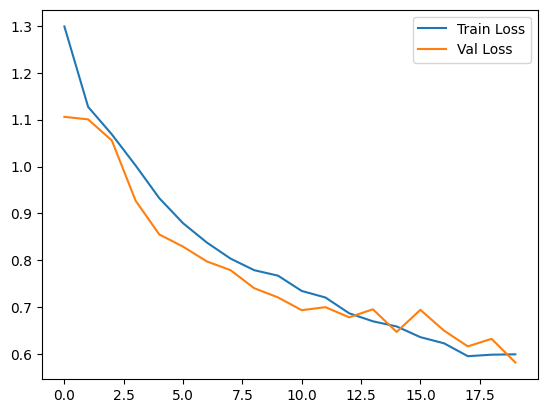

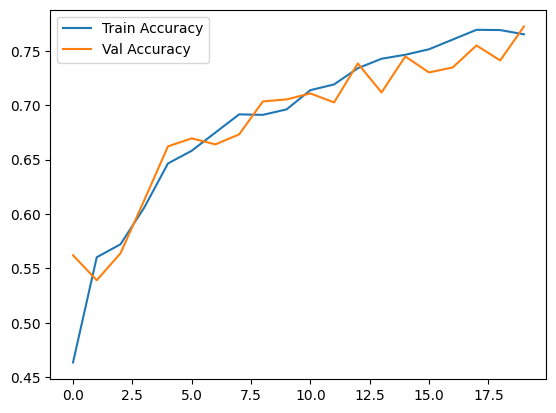

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_S101')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_S101')

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

69/69 [==============================] - 121s 2s/step
              precision    recall  f1-score   support

           0       0.33      0.37      0.35      1412
           1       0.13      0.10      0.11       545
           2       0.11      0.11      0.11       400
           3       0.12      0.15      0.14       586
           4       0.32      0.28      0.30      1420

    accuracy                           0.25      4363
   macro avg       0.20      0.20      0.20      4363
weighted avg       0.25      0.25      0.25      4363



## Resize Citra 128x128

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
69/69 [==============================] - 1492s 22s/step - loss: 1.2455 - accuracy: 0.5038 - val_loss: 1.0896 - val_accuracy: 0.5638
Epoch 2/20
69/69 [==============================] - 547s 8s/step - loss: 1.0964 - accuracy: 0.5698 - val_loss: 0.9330 - val_accuracy: 0.6556
Epoch 3/20
69/69 [==============================] - 549s 8s/step - loss: 0.9543 - accuracy: 0.6310 - val_loss: 0.8650 - val_accuracy: 0.6529
Epoch 4/20
69/69 [==============================] - 553s 8s/step - loss: 0.8968 - accuracy: 0.6555 - val_loss: 0.8233 - val_accuracy: 0.6731
Epoch 5/20
69/69 [==============================] - 524s 8s/step - loss: 0.8244 - accuracy: 0.6826 - val_loss: 0.7497 - val_accuracy: 0.7098
Epoch 6/20
69/69 [==============================] - 555s 8s/step - loss: 0.7961 - accuracy: 0.6881 - val_loss: 0.7628 - val_accuracy: 0.7034
Epoch 7/20
69/69 [==============================] - 551s 8s/step - loss: 0.7623 - accuracy: 0.7050 - val_loss: 0.7665 - val_accuracy: 0.6951
Epoch 8/20


### Evaluasi Citra 128x128

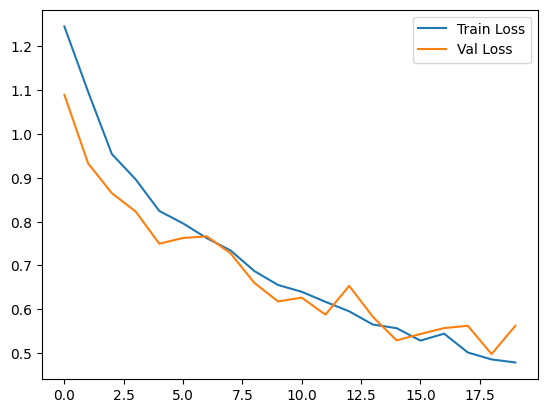

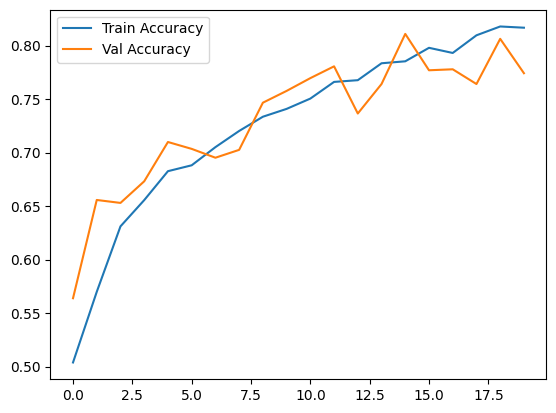

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
# plt.savefig(LossVal_loss_S102)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
# plt.savefig(AccVal_acc_S102)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

69/69 [==============================] - 224s 3s/step
              precision    recall  f1-score   support

           0       0.31      0.38      0.34      1412
           1       0.15      0.10      0.12       545
           2       0.09      0.14      0.10       400
           3       0.11      0.08      0.09       586
           4       0.32      0.27      0.30      1420

    accuracy                           0.25      4363
   macro avg       0.20      0.19      0.19      4363
weighted avg       0.25      0.25      0.24      4363



## Resize Citra 150x150

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

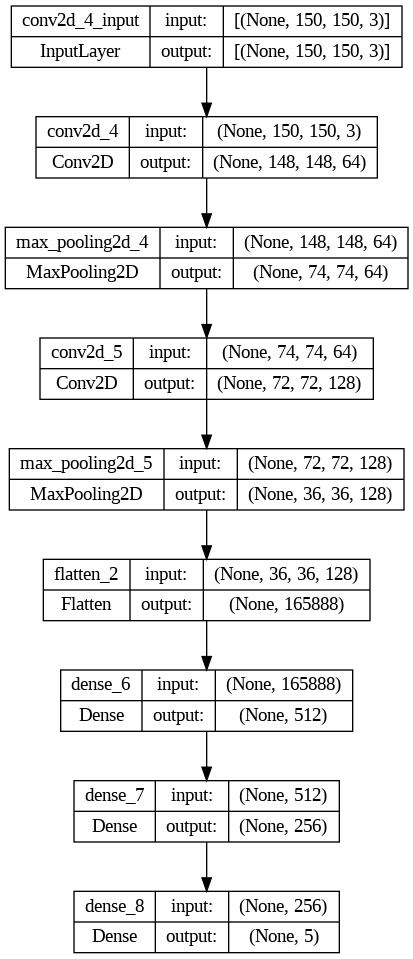

In [ ]:
#intermezzo
import keras
import IPython
keras.utils.plot_model(model, to_file='test_keras_plot_model.png', show_shapes=True)
IPython.display.Image("test_keras_plot_model.png")

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
69/69 [==============================] - 698s 10s/step - loss: 1.2645 - accuracy: 0.5019 - val_loss: 1.0452 - val_accuracy: 0.6244
Epoch 2/20
69/69 [==============================] - 681s 10s/step - loss: 1.0523 - accuracy: 0.6044 - val_loss: 0.9239 - val_accuracy: 0.6740
Epoch 3/20
69/69 [==============================] - 699s 10s/step - loss: 0.9306 - accuracy: 0.6356 - val_loss: 0.8686 - val_accuracy: 0.6575
Epoch 4/20
69/69 [==============================] - 698s 10s/step - loss: 0.8959 - accuracy: 0.6507 - val_loss: 0.9879 - val_accuracy: 0.6217
Epoch 5/20
69/69 [==============================] - 692s 10s/step - loss: 0.8269 - accuracy: 0.6812 - val_loss: 0.7509 - val_accuracy: 0.7126
Epoch 6/20
69/69 [==============================] - 693s 10s/step - loss: 0.7804 - accuracy: 0.6972 - val_loss: 0.8003 - val_accuracy: 0.6612
Epoch 7/20
69/69 [==============================] - 698s 10s/step - loss: 0.7635 - accuracy: 0.7089 - val_loss: 0.7412 - val_accuracy: 0.7080
Epoch 

### Evaluasi Resize Citra 150x150

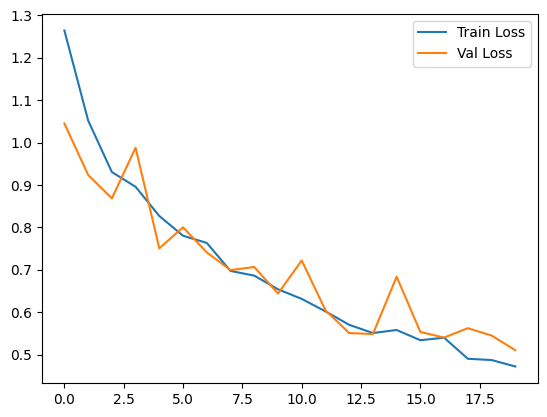

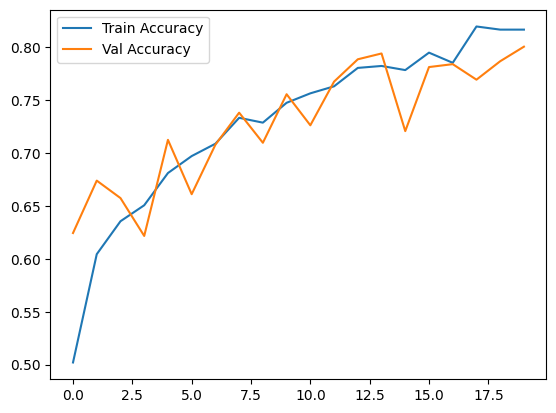

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
# plt.savefig(LossVal_loss_S103)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
# plt.savefig(AccVal_acc_S103)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

69/69 [==============================] - 255s 4s/step
              precision    recall  f1-score   support

           0       0.32      0.35      0.33      1412
           1       0.12      0.14      0.13       545
           2       0.09      0.07      0.08       400
           3       0.16      0.14      0.15       586
           4       0.34      0.32      0.33      1420

    accuracy                           0.26      4363
   macro avg       0.21      0.21      0.21      4363
weighted avg       0.26      0.26      0.26      4363



# 2️⃣ Bagian 2, Skenario 2 : Perubahan Jenis Optimizer

---

Parameter yang tetap dalam Skenario ini adalah sebagai berikut.

*Image Size* 150x150
*Epoch* **20**
*Batch Size* **64**
*Learning Rate* **0.0001**
*Callback*

## Optimizer Adam

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', #input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
train_generator.classes

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

### Evaluasi Optimizer Adam

In [ ]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig(LossVal_loss_S201)

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
plt.savefig(AccVal_acc_S201)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

## Optimizer Nadam

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
train_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.experimental.Nadam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
69/69 [==============================] - 1326s 19s/step - loss: 1.2849 - accuracy: 0.4742 - val_loss: 1.0420 - val_accuracy: 0.5702
Epoch 2/20
69/69 [==============================] - 729s 11s/step - loss: 1.0387 - accuracy: 0.6017 - val_loss: 0.8950 - val_accuracy: 0.6511
Epoch 3/20
69/69 [==============================] - 728s 11s/step - loss: 0.9190 - accuracy: 0.6392 - val_loss: 0.8265 - val_accuracy: 0.6474
Epoch 4/20
69/69 [==============================] - 732s 11s/step - loss: 0.8467 - accuracy: 0.6677 - val_loss: 0.8520 - val_accuracy: 0.6740
Epoch 5/20
69/69 [==============================] - 730s 11s/step - loss: 0.8057 - accuracy: 0.6842 - val_loss: 0.7601 - val_accuracy: 0.7025
Epoch 6/20
69/69 [==============================] - 728s 11s/step - loss: 0.7617 - accuracy: 0.7025 - val_loss: 0.7266 - val_accuracy: 0.7034
Epoch 7/20
69/69 [==============================] - 737s 11s/step - loss: 0.7341 - accuracy: 0.7181 - val_loss: 0.7503 - val_accuracy: 0.6896
Epoch

### Evaluasi Nadam

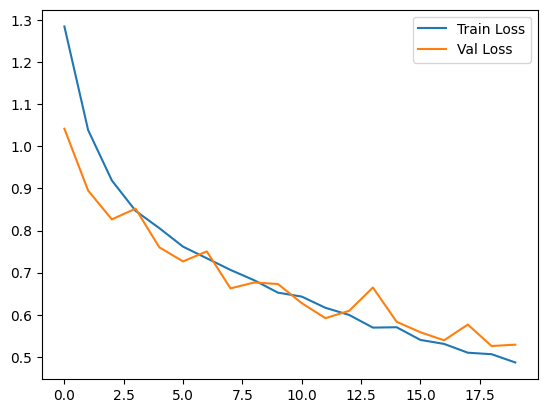

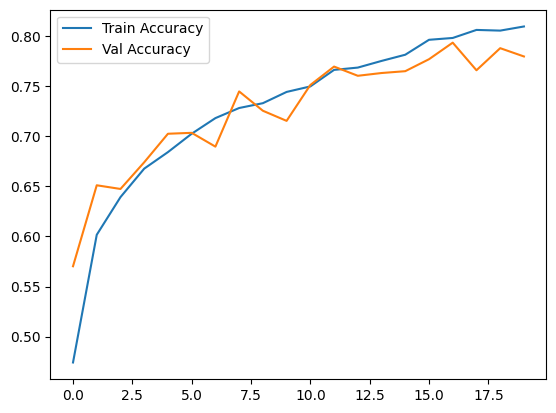

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
# plt.savefig(LossVal_loss_S202)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
# plt.savefig(AccVal_acc_S202)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

69/69 [==============================] - 255s 4s/step
              precision    recall  f1-score   support

           0       0.33      0.37      0.35      1412
           1       0.12      0.15      0.13       545
           2       0.10      0.10      0.10       400
           3       0.14      0.08      0.10       586
           4       0.34      0.32      0.33      1420

    accuracy                           0.26      4363
   macro avg       0.21      0.21      0.20      4363
weighted avg       0.26      0.26      0.26      4363



## Optimizer RMSProp

In [11]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [14]:
train_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [15]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [16]:
model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/20
69/69 [==============================] - 1517s 22s/step - loss: 1.3924 - accuracy: 0.4034 - val_loss: 1.2224 - val_accuracy: 0.4628
Epoch 2/20
69/69 [==============================] - 708s 10s/step - loss: 1.1894 - accuracy: 0.5129 - val_loss: 1.0380 - val_accuracy: 0.6033
Epoch 3/20
69/69 [==============================] - 707s 10s/step - loss: 1.0959 - accuracy: 0.5739 - val_loss: 0.9743 - val_accuracy: 0.6437
Epoch 4/20
69/69 [==============================] - 703s 10s/step - loss: 1.0250 - accuracy: 0.6055 - val_loss: 1.1112 - val_accuracy: 0.5482
Epoch 5/20
69/69 [==============================] - 711s 10s/step - loss: 0.9735 - accuracy: 0.6241 - val_loss: 0.9054 - val_accuracy: 0.6373
Epoch 6/20
69/69 [==============================] - 692s 10s/step - loss: 0.9218 - accuracy: 0.6477 - val_loss: 0.9996 - val_accuracy: 0.6097
Epoch 7/20
69/69 [==============================] - 712s 10s/step - loss: 0.8910 - accuracy: 0.6553 - val_loss: 0.7930 - val_accuracy: 0.6878
Epoch

### Evaluasi RMSProp

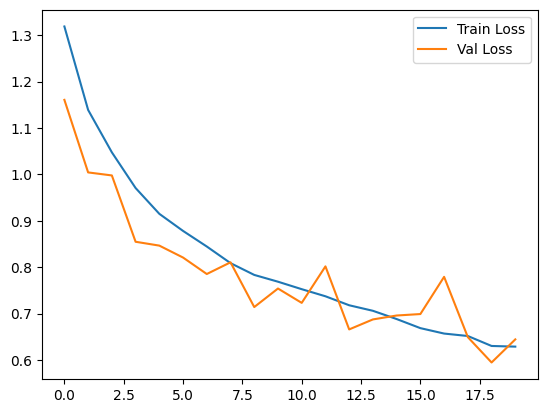

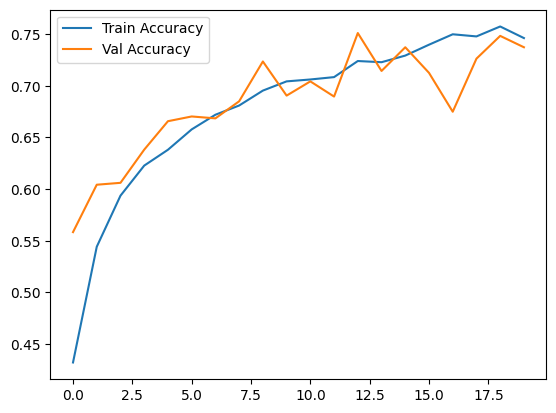

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
# plt.savefig(LossVal_loss_S203)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
# plt.savefig(AccVal_acc_S203)

In [17]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

69/69 [==============================] - 117s 2s/step
              precision    recall  f1-score   support

           0       0.31      0.38      0.34      1412
           1       0.12      0.11      0.12       545
           2       0.09      0.14      0.11       400
           3       0.14      0.06      0.08       586
           4       0.34      0.31      0.32      1420

    accuracy                           0.26      4363
   macro avg       0.20      0.20      0.19      4363
weighted avg       0.25      0.26      0.25      4363



# 3️⃣ Bagian 3, Skenario 3 : Perubahan Nilai Learning Rate
---
Parameter yang tetap dalam Skenario ini adalah sebagai berikut.

*Image Size* 150x150
*Optimizer* Adam
*Epoch* **20**
*Batch Size* **64**
*Callback*


## Learning Rate 0.1

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
train_generator.classes

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.#rmsprop(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

### Evaluasi Learning Rate 0.1

In [ ]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig(LossVal_loss_S301)

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
plt.savefig(AccVal_acc_S301)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

## Learning Rate 0.001

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

Found 4363 images belonging to 5 classes.
Found 1089 images belonging to 5 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [7]:
train_generator.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [8]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

NameError: name 'model' is not defined

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

### Evaluasi Learning Rate 0.001

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
# plt.savefig(LossVal_loss_S302)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
# plt.savefig(AccVal_acc_S302)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

## Learning Rate 0.0001

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
train_generator.classes

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.#rmsprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

### Evaluasi Learning Rate 0.0001

In [ ]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig(LossVal_loss_S303)

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
plt.savefig(AccVal_acc_S303)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

# 4️⃣ Bagian 4, Skenario 4 : Perubahan Ukuran Batch
---
Parameter yang tetap dalam Skenario ini adalah sebagai berikut.

*Image Size*
*Optimizer*
*Epoch* **20**
*Learning Rate*
*Callback*



## Ukuran Batch 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(32,32),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(32,32),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
train_generator.classes

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.#rmsprop(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

### Evaluasi Ukuran Batch 32

In [ ]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig(LossVal_loss_S401)

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
plt.savefig(AccVal_acc_S401)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

## Ukuran Batch 64

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(64,64),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
train_generator.classes

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.#rmsprop(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

### Evaluasi Ukuran Batch 64

In [ ]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig(LossVal_loss_S402)

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
plt.savefig(AccVal_acc_S402)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))

## Ukuran Batch 128

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    # preprocessing_function=AHE
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_train,
    # target_size=(128,128),
    batch_size=64,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
train_generator.classes

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
model.compile(optimizer=tf.keras.optimizers.#rmsprop(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=20,
                    callbacks=[early_stop],
                    verbose=1)

### Evaluasi Ukuran Batch 128

In [ ]:
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
plt.savefig(LossVal_loss_S403)

plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()
plt.savefig(AccVal_acc_S403)

In [ ]:
from sklearn.metrics import classification_report

Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(train_generator.classes, y_pred))